Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

1. Первичная обработка данных. 

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [181]:
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Рассмотрим  столбцы по отдельности. 



1.1. school. Посмотрим, сколько похожих абривеатур школ содержит наш датасет

In [182]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


1.2. sex

In [183]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


1.3. age

In [124]:
pd.DataFrame(stud_math.age.value_counts())

,age
16,104
17,98
15,82
18,82
19,24
20,3
22,1
21,1


1.4. address 

In [125]:
pd.DataFrame(stud_math.address.value_counts())

,address
U,295
R,83


In [126]:
pd.DataFrame(stud_math.address.value_counts())

,address
U,295
R,83


1.5. famsize - размер семьи('LE3' <= 3, 'GT3' >3) 

In [127]:
pd.DataFrame(stud_math.famsize.value_counts())

,famsize
GT3,261
LE3,107


1.6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [128]:
pd.DataFrame(stud_math.Pstatus.value_counts())

,Pstatus
T,314
A,36


1.7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [129]:
pd.DataFrame(stud_math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count     392
unique      5
top       4.0
freq      131
Name: Medu, dtype: object

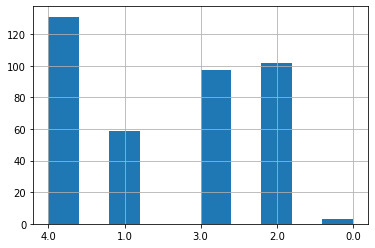

In [130]:
stud_math.Medu.hist()
stud_math.Medu.describe()

1.8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [131]:
pd.DataFrame(stud_math.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count     371
unique      6
top       2.0
freq      106
Name: Fedu, dtype: object

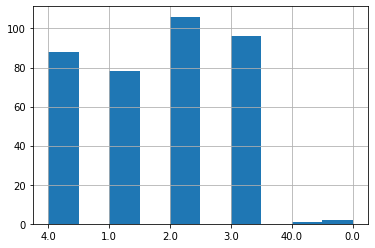

In [132]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

1.9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [133]:
pd.DataFrame(stud_math.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

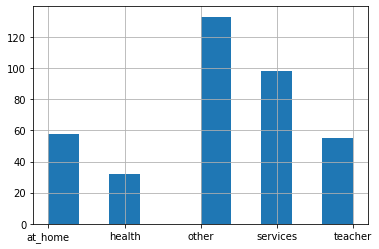

In [134]:
stud_math.Mjob.hist()
stud_math.Mjob.describe()

1.10.Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [135]:
pd.DataFrame(stud_math.Fjob.value_counts())

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

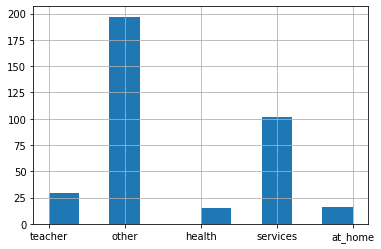

In [136]:
stud_math.Fjob.hist()
stud_math.Fjob.describe()

1.11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [137]:
pd.DataFrame(stud_math.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

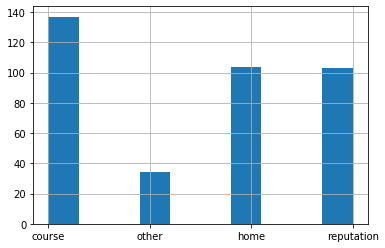

In [138]:
stud_math.reason.hist()
stud_math.reason.describe()

1.12.guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое

In [139]:
pd.DataFrame(stud_math.guardian.value_counts())

,guardian
mother,250
father,86
other,28


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

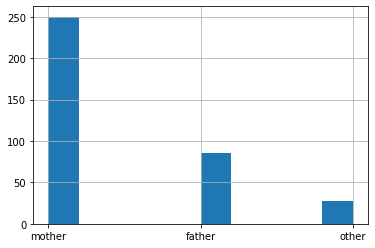

In [140]:
stud_math.guardian.hist()
stud_math.guardian.describe()

1.3. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [141]:
pd.DataFrame(stud_math.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


count     367
unique      4
top       1.0
freq      242
Name: traveltime, dtype: object

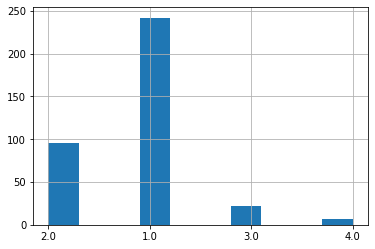

In [142]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

1.4. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [143]:
pd.DataFrame(stud_math.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count     388
unique      4
top       2.0
freq      194
Name: studytime, dtype: object

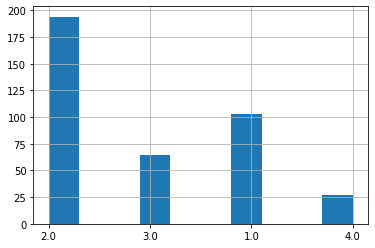

In [144]:
stud_math.studytime.hist()
stud_math.studytime.describe()

1.5. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [145]:
pd.DataFrame(stud_math.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count     373
unique      4
top       0.0
freq      293
Name: failures, dtype: object

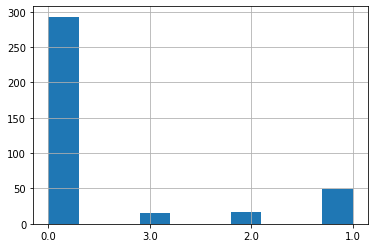

In [146]:
stud_math.failures.hist()
stud_math.failures.describe()

1.6. schoolsup — дополнительная образовательная поддержка (yes или no)

In [147]:
pd.DataFrame(stud_math.schoolsup.value_counts())

,schoolsup
no,335
yes,51


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

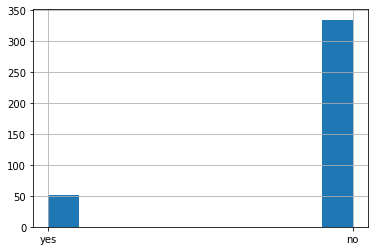

In [148]:
stud_math.schoolsup.hist()
stud_math.schoolsup.describe()

17 famsup — семейная образовательная поддержка (yes или no)



In [149]:
pd.DataFrame(stud_math.famsup.value_counts())

,famsup
yes,219
no,137


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

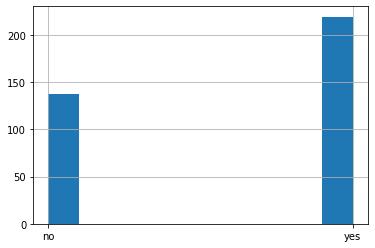

In [150]:
stud_math.famsup.hist()
stud_math.famsup.describe()

18 paid — дополнительные платные занятия по математике (yes или no)



In [151]:
pd.DataFrame(stud_math.paid.value_counts())

,paid
no,200
yes,155


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

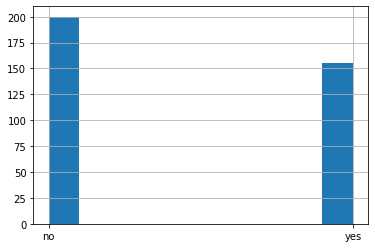

In [152]:
stud_math.paid.hist()
stud_math.paid.describe()

19 activities — дополнительные внеучебные занятия (yes или no)

In [37]:
pd.DataFrame(stud_math.activities.value_counts())

,activities
yes,195
no,186


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

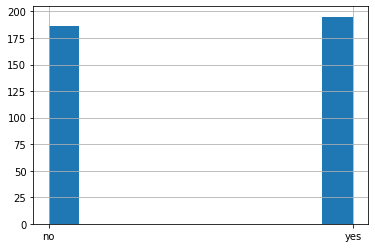

In [38]:
stud_math.activities.hist()
stud_math.activities.describe()

20 nursery — посещал детский сад (yes или no)

In [153]:
pd.DataFrame(stud_math.nursery.value_counts())

,nursery
yes,300
no,79


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

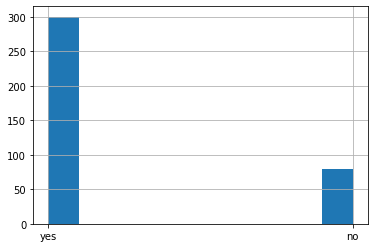

In [154]:
stud_math.nursery.hist()
stud_math.nursery.describe()

21 higher — хочет получить высшее образование (yes или no)

In [155]:
pd.DataFrame(stud_math.higher.value_counts())

,higher
yes,356
no,19


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

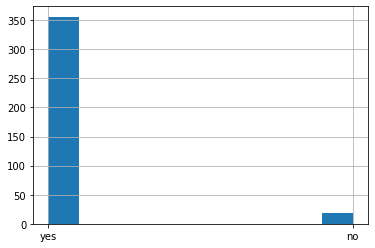

In [156]:
stud_math.higher.hist()
stud_math.higher.describe()

22 internet — наличие интернета дома (yes или no)

In [157]:
pd.DataFrame(stud_math.internet.value_counts())


,internet
yes,305
no,56


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

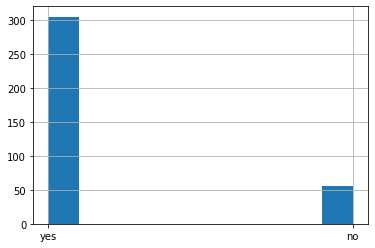

In [158]:
stud_math.internet.hist()
stud_math.internet.describe()

23 romantic — в романтических отношениях (yes или no)



In [159]:
pd.DataFrame(stud_math.romantic.value_counts())

,romantic
no,240
yes,124


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

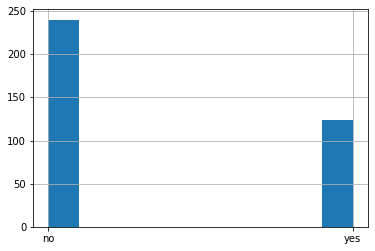

In [160]:
stud_math.romantic.hist()
stud_math.romantic.describe()

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [161]:
pd.DataFrame(stud_math.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


count     368
unique      6
top       4.0
freq      182
Name: famrel, dtype: object

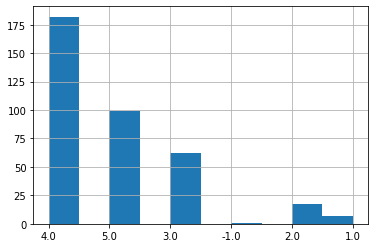

In [162]:
stud_math.famrel.hist()
stud_math.famrel.describe()

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [163]:
pd.DataFrame(stud_math.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count     384
unique      5
top       3.0
freq      153
Name: freetime, dtype: object

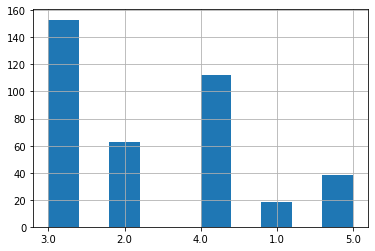

In [164]:
stud_math.freetime.hist()
stud_math.freetime.describe()

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [100]:
pd.DataFrame(stud_math.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count     387
unique      5
top       3.0
freq      127
Name: goout, dtype: object

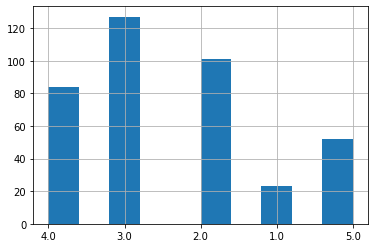

In [106]:
stud_math.goout.hist()
stud_math.goout.describe()

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [165]:
pd.DataFrame(stud_math.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count     380
unique      5
top       5.0
freq      138
Name: health, dtype: object

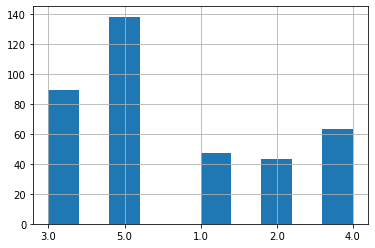

In [166]:
stud_math.health.hist()
stud_math.health.describe()

28 absences — количество пропущенных занятий!!

In [167]:
pd.DataFrame(stud_math.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count     383
unique     36
top       0.0
freq      111
Name: absences, dtype: object

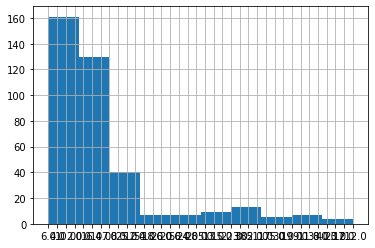

In [168]:
stud_math.absences.hist()
stud_math.absences.describe()

29 score — баллы по госэкзамену по математике

In [177]:
pd.DataFrame(stud_math.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
70.0,27
45.0,27
80.0,16


count      389
unique      18
top       50.0
freq        54
Name: score, dtype: object

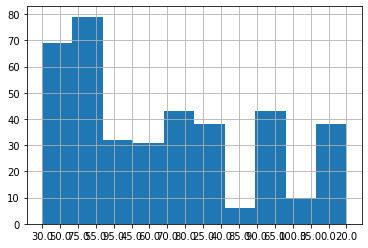

In [172]:
stud_math.score.hist()
stud_math.score.describe()

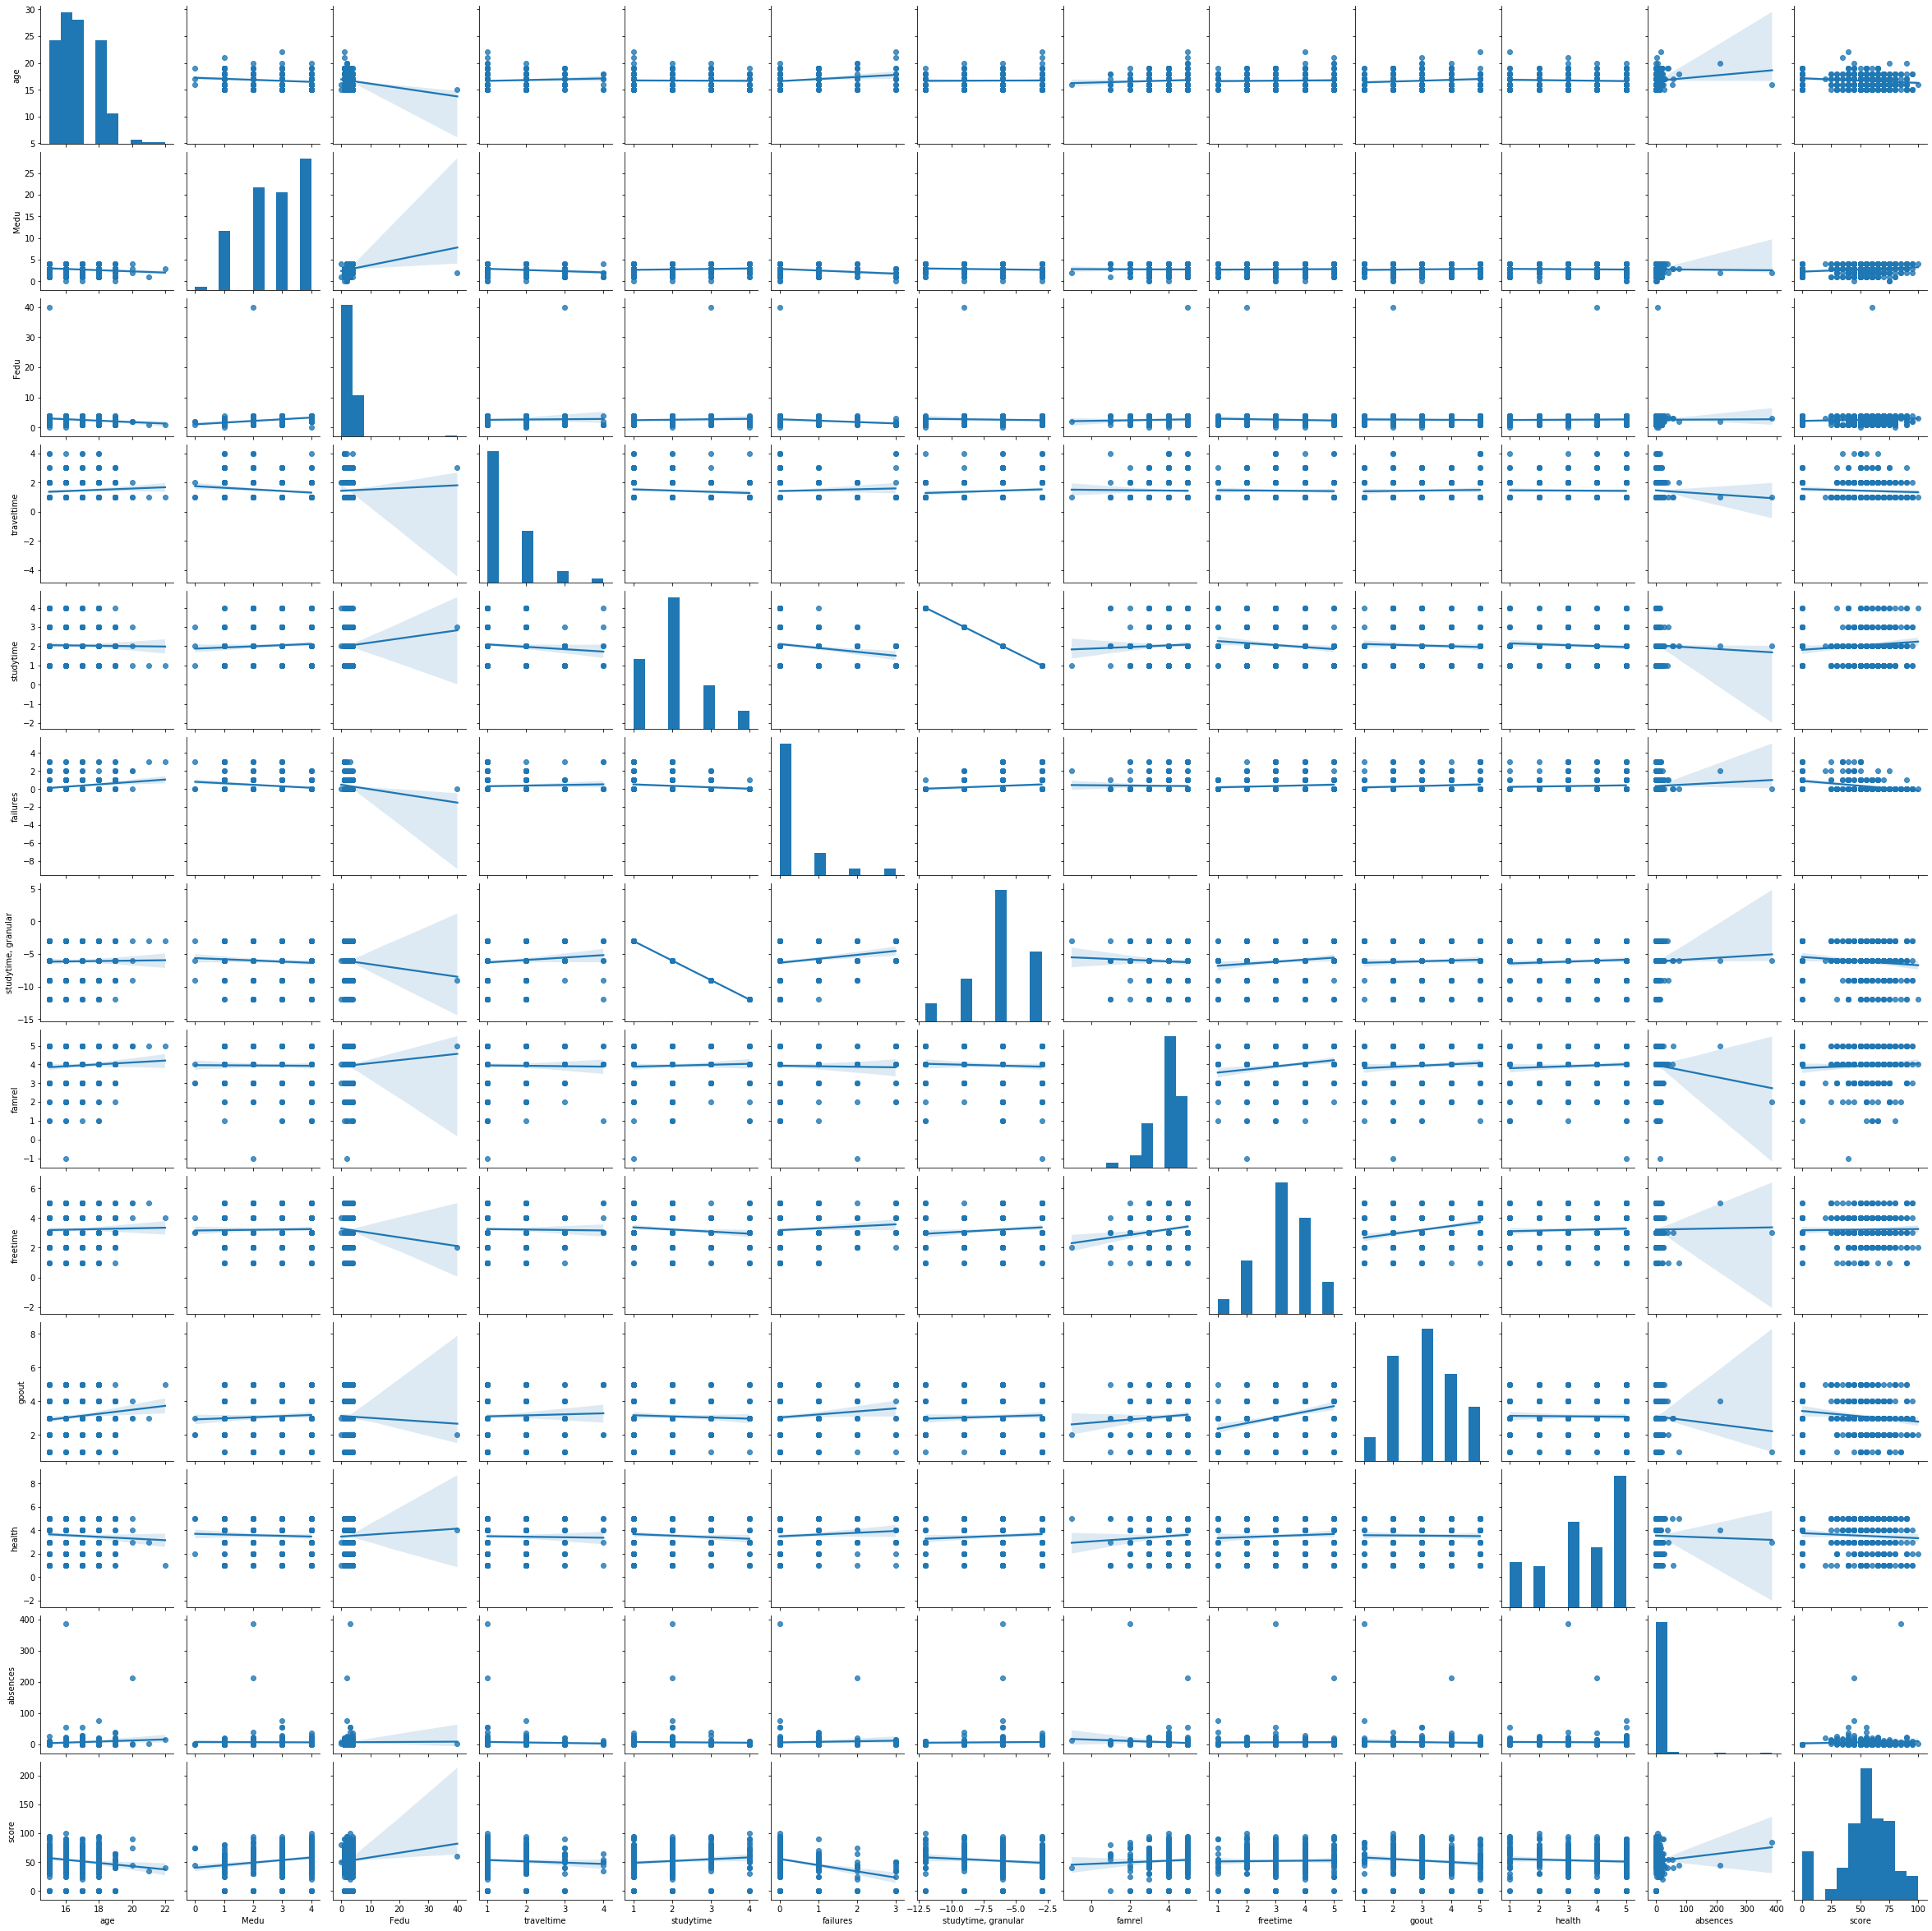

In [184]:
sns.pairplot(stud_math, kind = 'reg')

In [185]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [66]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()